In [1]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
            #  to predict the closing price of Apple corporation.

In [2]:
# To predict closing price of a stock with input of past 60 days stock price.

In [3]:
# 1) Do the same for any other company
# 2) Preidct the next 10 days price on the basis of past 500 days.
# 3) Apply inverse transform on above data.

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from datetime import date

In [5]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [6]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index = df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   12.4779   12.5577   12.4520   12.5198  3.544907e+08
2012-01-04   12.4849   12.6235   12.4600   12.5866  3.051786e+08
2012-01-05   12.6314   12.7422   12.5627   12.7272  3.178972e+08
2012-01-06   12.7800   12.8717   12.7630   12.8608  3.734286e+08
2012-01-09   12.9525   13.0213   12.8289   12.8408  4.620092e+08
...              ...       ...       ...       ...           ...
2023-07-10  189.2600  189.9900  187.0350  188.6100  5.992216e+07
2023-07-11  189.1600  189.3000  186.6000  188.0800  4.663812e+07
2023-07-12  189.6800  191.7000  188.4700  189.7700  6.075025e+07
2023-07-13  190.5000  191.1900  189.7800  190.5400  4.134234e+07
2023-07-14  190.2300  191.1799  189.6300  190.6900  4.161624e+07

[2901 rows x 5 columns]


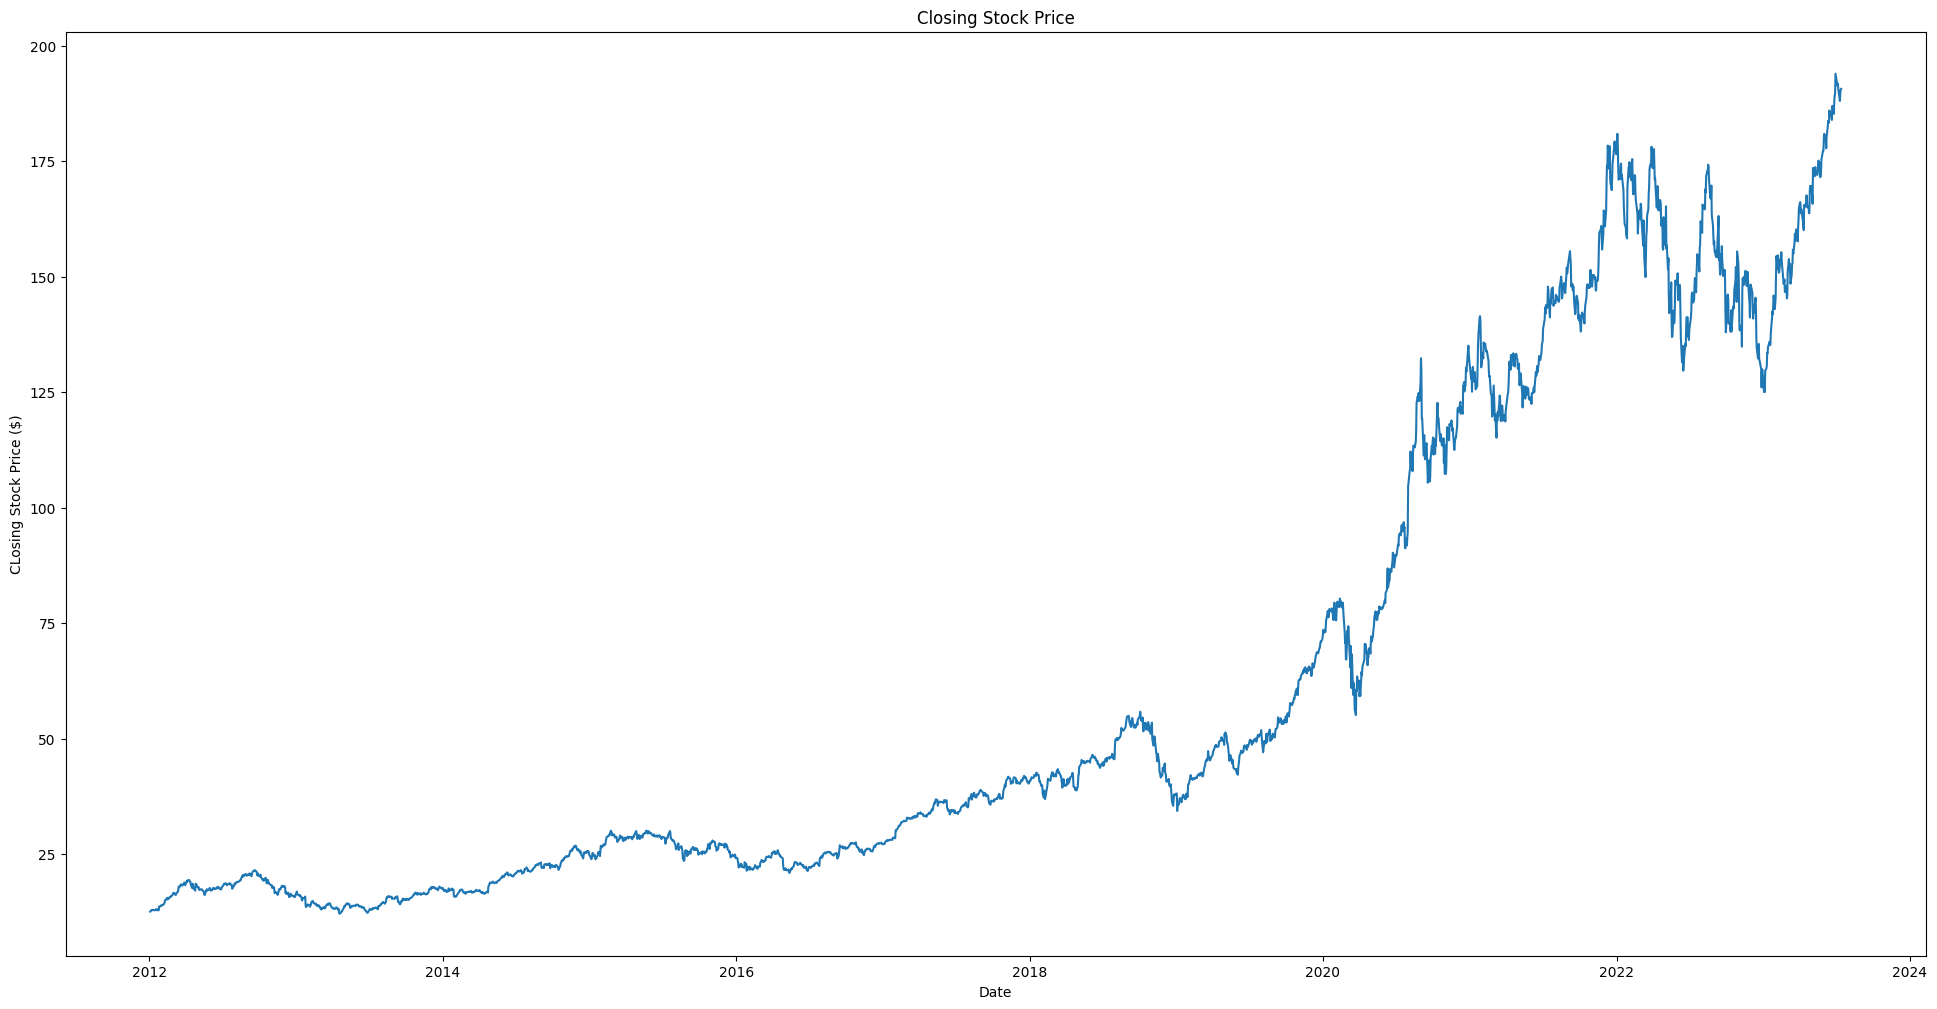

In [7]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(24,12))
plt.title("Closing Stock Price")
plt.plot(df['Close'])
plt.xlabel("Date")
plt.ylabel("CLosing Stock Price ($)")
plt.show()

In [8]:
#Create A New DataFrame with only Close column
data = df.filter(['Close'])
#Convert DataFrame To Numpy Array
dataset = data.values

# Training -> 80% data
# Testing -> 20% data

training_data_len = math.ceil((len(dataset)) * 0.8)
print(training_data_len)

2321


In [9]:
print(dataset)

[[ 12.5198]
 [ 12.5866]
 [ 12.7272]
 ...
 [189.77  ]
 [190.54  ]
 [190.69  ]]


In [10]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.00250459]
 [0.00287182]
 [0.00364474]
 ...
 [0.97691113]
 [0.98114409]
 [0.98196869]]


In [11]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len:]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

In [12]:
#Create The Scaled Trained DataSet
train_data_2 = scaled_data[0:training_data_len:]
x_train_2 = []
y_train_2 = []
for i in range(100, len(train_data)):
  x_train_2.append(train_data[i-100:i,0])
  y_train_2.append(train_data[i:i+3,0])

In [13]:
print(x_train_2[0])
print(y_train_2[0])

[0.00250459 0.00287182 0.00364474 0.00437919 0.00426924 0.00452157
 0.00440668 0.00420877 0.0039405  0.00474092 0.0054913  0.00526151
 0.00402296 0.00520654 0.00403945 0.00842909 0.00809485 0.00853354
 0.00948678 0.01007884 0.01002992 0.0098485  0.01060494 0.01132839
 0.01213925 0.01345477 0.01621169 0.01625567 0.01779547 0.01894112
 0.01697362 0.01772401 0.01770752 0.01983994 0.01953868 0.02009722
 0.02111697 0.021681   0.02328183 0.02446541 0.02480515 0.02493159
 0.02290361 0.02241545 0.02249241 0.02438295 0.02493159 0.02606019
 0.02876214 0.03235191 0.03167793 0.03167793 0.03427543 0.03509234
 0.03451732 0.03397968 0.03343764 0.03525671 0.0365178  0.03704335
 0.03574487 0.03401266 0.03721926 0.03899986 0.03816206 0.03966888
 0.04015705 0.03885802 0.03847981 0.03790368 0.03496095 0.03076263
 0.03571739 0.03549255 0.03199568 0.02957355 0.0293597  0.02744168
 0.03576686 0.03538315 0.03459923 0.03140966 0.03110236 0.0317494
 0.03104794 0.02828057 0.02899248 0.02877863 0.02893805 0.02916

In [16]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [27]:
unscaled_data = scaler.inverse_transform(dataset)
print(unscaled_data)

[[ 2289.48843484]
 [ 2301.63974228]
 [ 2327.21569776]
 ...
 [34532.327866  ]
 [34672.395332  ]
 [34699.681202  ]]


In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [31]:
# Build The Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1))) # Input Layer
model.add(LSTM(50, return_sequences = False)) # Long Term Memory Layer
model.add(Dense(25)) # Short Term Memory Layer
model.add(Dense(1)) # Forget Gate

In [33]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, batch_size = 100, epochs = 64)

Epoch 1/64
23/23 [==============================] - 11s 107ms/step - loss: 1.4245e-04
Epoch 2/64
23/23 [==============================] - 2s 109ms/step - loss: 9.2116e-05
Epoch 3/64
23/23 [==============================] - 3s 137ms/step - loss: 9.1965e-05
Epoch 4/64
23/23 [==============================] - 4s 159ms/step - loss: 8.0877e-05
Epoch 5/64
23/23 [==============================] - 2s 103ms/step - loss: 8.6661e-05
Epoch 6/64
23/23 [==============================] - 2s 103ms/step - loss: 8.0045e-05
Epoch 7/64
23/23 [==============================] - 2s 103ms/step - loss: 7.9884e-05
Epoch 8/64
23/23 [==============================] - 2s 101ms/step - loss: 7.5077e-05
Epoch 9/64
23/23 [==============================] - 4s 185ms/step - loss: 7.0761e-05
Epoch 10/64
23/23 [==============================] - 4s 155ms/step - loss: 6.3061e-05
Epoch 11/64
23/23 [==============================] - 2s 101ms/step - loss: 8.0186e-05
Epoch 12/64
23/23 [==============================] - 2s 99ms/s

In [34]:
# Create a Testing Dataset
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len :, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [35]:
# Convert Data Into Numpy Array
x_test = np.array(x_test)
# Reshape The Data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
# Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("Error % = ", rmse)
print("Accuracy % = ", (100-rmse))

19/19 [==============================] - 1s 18ms/step
Error % =  2.909985261916901
Accuracy % =  97.0900147380831


<ipython-input-40-c8af41b10fce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


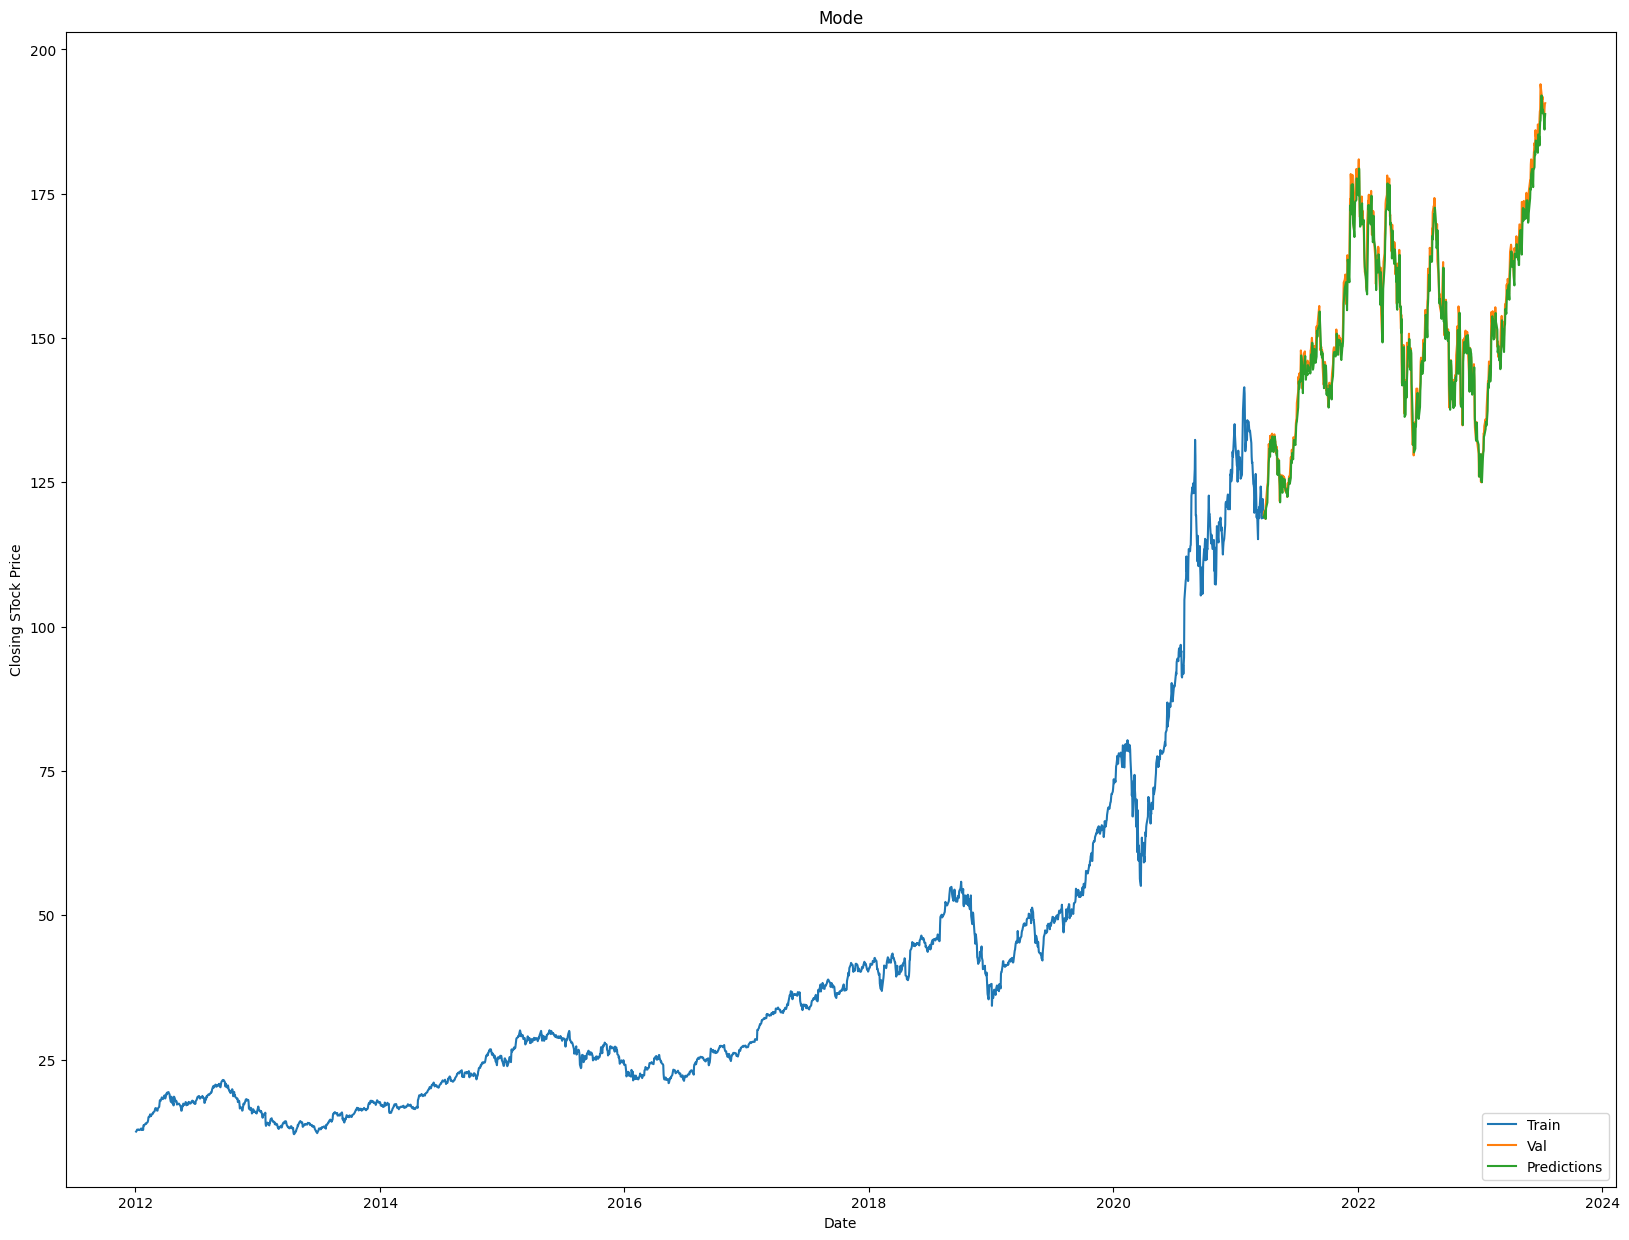

In [40]:
# Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(20,15))
plt.title("Mode")
plt.xlabel("Date")
plt.ylabel("Closing STock Price")
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [42]:
# Use Model to Predict Future Price
apple_quote = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[:60].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 41ms/step
[[166.63023]]
